In [38]:
import pickle
import pathlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
DATA_DIR = pathlib.Path.cwd().parent / 'data'
print(DATA_DIR)

/Users/st4pzz/Desktop/insper_2023.2/machine_learning/proj_ML/MachineLearning-23.2/data


In [40]:
clean_data_path = DATA_DIR / 'processed' / 'ames_clean.pkl'

In [41]:
with open(clean_data_path, 'rb') as file:
    data = pickle.load(file)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2877 entries, 0 to 2929
Data columns (total 70 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   MS.SubClass      2877 non-null   category
 1   MS.Zoning        2877 non-null   category
 2   Lot.Frontage     2877 non-null   float64 
 3   Lot.Area         2877 non-null   float64 
 4   Lot.Shape        2877 non-null   category
 5   Land.Contour     2877 non-null   category
 6   Lot.Config       2877 non-null   category
 7   Land.Slope       2877 non-null   category
 8   Neighborhood     2877 non-null   category
 9   Bldg.Type        2877 non-null   category
 10  House.Style      2877 non-null   category
 11  Overall.Qual     2877 non-null   category
 12  Overall.Cond     2877 non-null   category
 13  Roof.Style       2877 non-null   category
 14  Mas.Vnr.Type     2877 non-null   category
 15  Mas.Vnr.Area     2877 non-null   float64 
 16  Exter.Qual       2877 non-null   category


## Feature Engineering 

Analisando as features categóricas primeiro

In [43]:
def plot_categoricals(data, cols, sorted=True):
    summary = data[cols] \
        .describe() \
        .transpose() \
        .sort_values(by='count')

    print(summary)

    for k, (col, val) in enumerate(summary['count'].items()):
        plt.figure()
        ser = data[col].value_counts()
        if sorted:
            ser = ser.sort_values()
        else:
            ser = ser.sort_index()
        ax = ser.plot.barh()
        for container in ax.containers:
            ax.bar_label(container)
        plt.title(f'{col}, n={int(val)}')
        plt.show()

In [44]:
def plot_numericals(data, cols):
    summary = data[cols] \
        .describe() \
        .transpose() \
        .sort_values(by='count')

    print(summary)

    n = data.shape[0]
    b = int(np.sqrt(n))
    for k, (col, val) in enumerate(summary['count'].items()):
        plt.figure()
        data[col].plot.hist(bins=b)
        plt.title(f'{col}, n={int(val)}')
        plt.show()

In [45]:
def remap_categories(
    series: pd.Series,
    old_categories: tuple[str],
    new_category: str,
) -> pd.Series:
    # Add the new category to the list of valid categories.
    series = series.cat.add_categories(new_category)

    # Set all items of the old categories as the new category.
    remapped_items = series.isin(old_categories)
    series.loc[remapped_items] = new_category

    # Clean up the list of categories, the old categories no longer exist.
    series = series.cat.remove_unused_categories()

    return series

In [46]:
processed_data = data.copy()

               count unique     top  freq
Sale.Condition  2877      6  Normal  2375


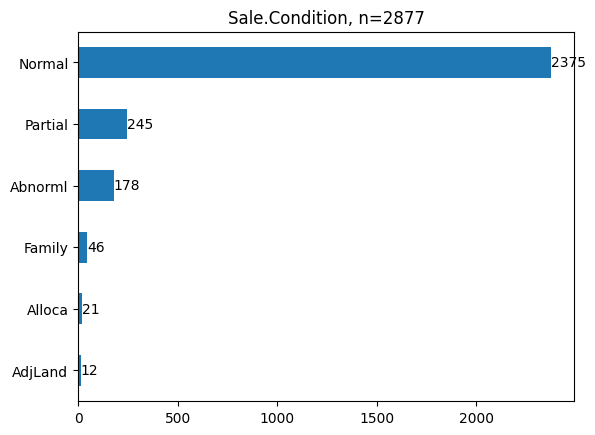

In [47]:
plot_categoricals(data,['Sale.Condition'])

`Nesta feature podemos agrupar as tres categorias de menos relevância em uma única categoria 'Others'.`

In [48]:
processed_data['Sale.Condition'].value_counts()

Normal     2375
Partial     245
Abnorml     178
Family       46
Alloca       21
AdjLand      12
Name: Sale.Condition, dtype: int64

In [49]:
processed_data['Sale.Condition'] = remap_categories(
    series=processed_data['Sale.Condition'],
    old_categories=('Family','Alloca','AdjLand'),
    new_category='Other',
)

In [50]:
processed_data['Sale.Condition'].value_counts()

Normal     2375
Partial     245
Abnorml     178
Other        79
Name: Sale.Condition, dtype: int64

           count unique     top  freq
Lot.Config  2877      5  Inside  2101


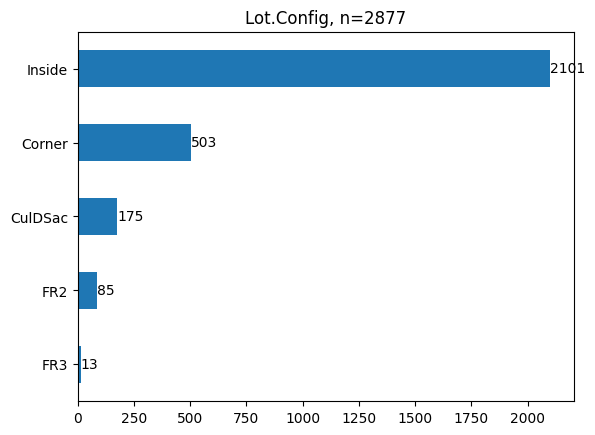

In [51]:
plot_categoricals(data,['Lot.Config'])

`Olhando a documentação do dataset, as duas categorias desta feature com menos relevância estão relacionadas com a quantidade de fachadas da casa, então podemos agrupar essas duas categorias em uma única 'FrontAge'`

In [52]:
processed_data['Lot.Config'].value_counts()

Inside     2101
Corner      503
CulDSac     175
FR2          85
FR3          13
Name: Lot.Config, dtype: int64

In [53]:
processed_data['Lot.Config'] = remap_categories(
    series=processed_data['Lot.Config'],
    old_categories=('FR2','FR3'),
    new_category='FrontAge',
)

In [54]:
processed_data['Lot.Config'].value_counts()

Inside      2101
Corner       503
CulDSac      175
FrontAge      98
Name: Lot.Config, dtype: int64

            count unique     top  freq
House.Style  2877      8  1Story  1452


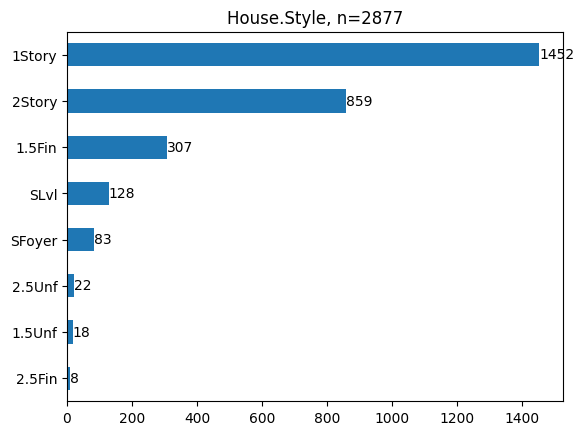

In [55]:
plot_categoricals(data,['House.Style'])

`Aqui podemos agrupar as 3 categorias de menos importância em uma única 'Other'`

In [56]:
processed_data['House.Style'].value_counts()

1Story    1452
2Story     859
1.5Fin     307
SLvl       128
SFoyer      83
2.5Unf      22
1.5Unf      18
2.5Fin       8
Name: House.Style, dtype: int64

In [57]:
processed_data['House.Style'] = remap_categories(
    series=processed_data['House.Style'],
    old_categories=('2.5Unf','1.5Unf','2.5Fin'),
    new_category='Other',
)

In [58]:
processed_data['House.Style'].value_counts()

1Story    1452
2Story     859
1.5Fin     307
SLvl       128
SFoyer      83
Other       48
Name: House.Style, dtype: int64

            count unique top  freq
Central.Air  2877      2   Y  2699


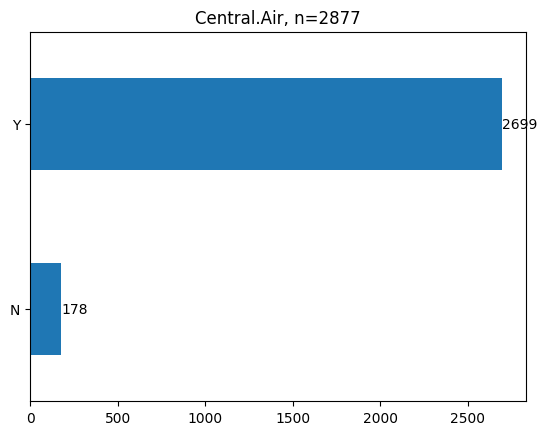

In [59]:
plot_categoricals(data,['Central.Air'])

` Como esta feature possui uma baixa relevância de dados, vamos exclui-lá do dataset`

In [60]:
processed_data['Central.Air'].value_counts()

Y    2699
N     178
Name: Central.Air, dtype: int64

In [61]:
processed_data = processed_data.drop(columns='Central.Air')

            count unique     top  freq
Garage.Type  2877      7  Attchd  1713


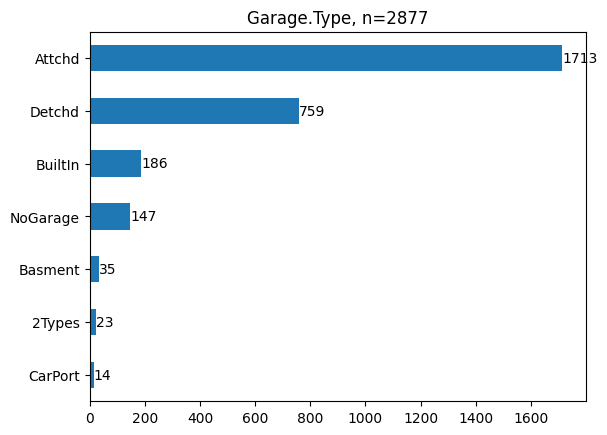

In [62]:
plot_categoricals(data,['Garage.Type'])

`Podemos agrupar as categorias de menos importancia em uma categoria 'Others'`

In [63]:
processed_data['Garage.Type'].value_counts()

Attchd      1713
Detchd       759
BuiltIn      186
NoGarage     147
Basment       35
2Types        23
CarPort       14
Name: Garage.Type, dtype: int64

In [64]:
processed_data['Garage.Type'] = remap_categories(
    series=processed_data['Garage.Type'],
    old_categories=('Basment','2Types','CarPort'),
    new_category='Other',
)

In [65]:
processed_data['Garage.Type'].value_counts()

Attchd      1713
Detchd       759
BuiltIn      186
NoGarage     147
Other         72
Name: Garage.Type, dtype: int64

 Agora vamos analisar as features ordinais 

          count unique  top  freq
Lot.Shape  2877      4  Reg  1825


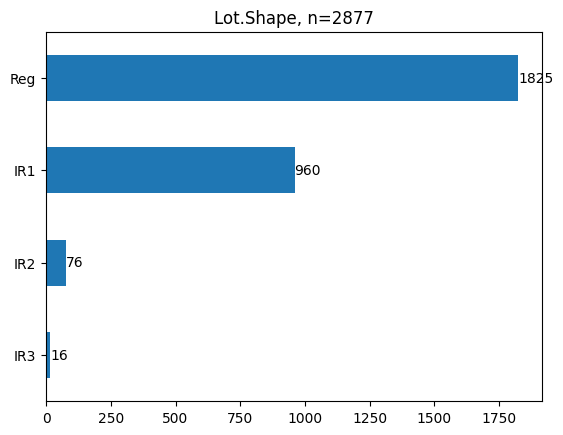

In [66]:
plot_categoricals(data,['Lot.Shape'])

`Vamos agrupar as 3 categorias de menos importancia, que são relacionadas com a irregularidade do terreno, em uma única categoria 'IRR'`

In [67]:
processed_data['Lot.Shape'].value_counts()

Reg    1825
IR1     960
IR2      76
IR3      16
Name: Lot.Shape, dtype: int64

In [68]:
processed_data['Lot.Shape'] = remap_categories(
    series=processed_data['Lot.Shape'],
    old_categories=('IR1','IR2','IR3'),
    new_category='IRR'
)

In [69]:
processed_data['Lot.Shape'].value_counts()

Reg    1825
IRR    1052
Name: Lot.Shape, dtype: int64

              count  unique  top  freq
Overall.Qual   2877      10    5   818
Overall.Cond   2877       9    5  1638


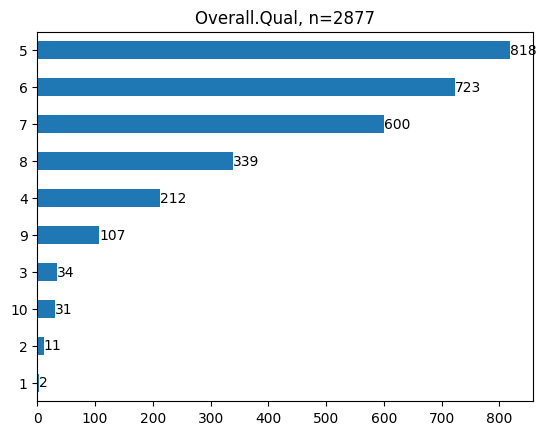

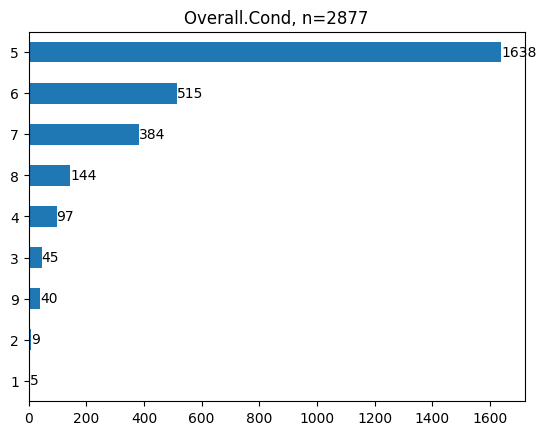

In [70]:
plot_categoricals(data,['Overall.Qual','Overall.Cond',])

`As features acima vamos manter como estão.`

           count unique  top  freq
Land.Slope  2877      3  Gtl  2743


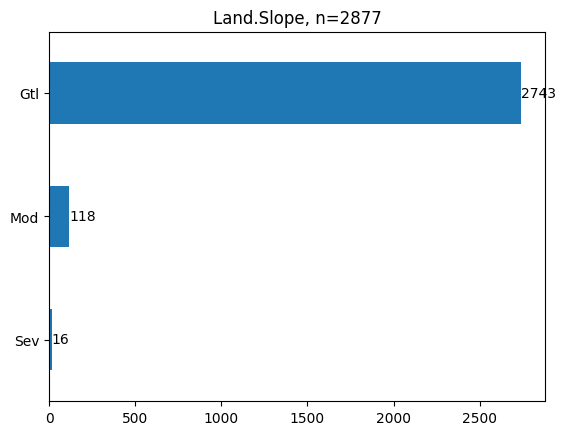

In [71]:
plot_categoricals(data,['Land.Slope'])

`Como podemos observar, a feature 'Land Slope' possui baixa representatividade nos dados, portanto iremos excluir essa feature`

In [72]:
processed_data['Land.Slope'].value_counts()

Gtl    2743
Mod     118
Sev      16
Name: Land.Slope, dtype: int64

In [73]:
processed_data = processed_data.drop(columns='Land.Slope')

           count unique top  freq
Exter.Qual  2877      4  TA  1767
Exter.Cond  2877      5  TA  2510


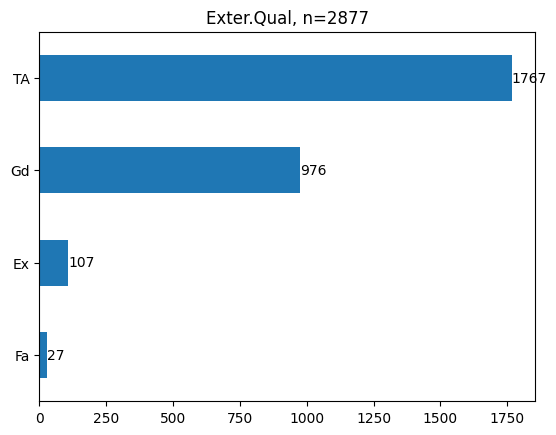

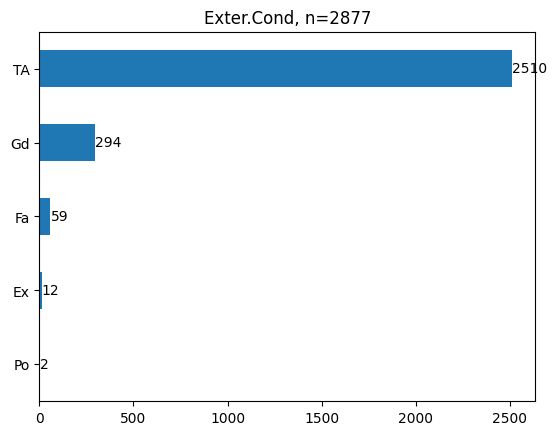

In [74]:
plot_categoricals(data,['Exter.Qual','Exter.Cond'])

` as duas features acima tambem vamos manter`

           count unique    top  freq
Electrical  2877      5  SBrkr  2642


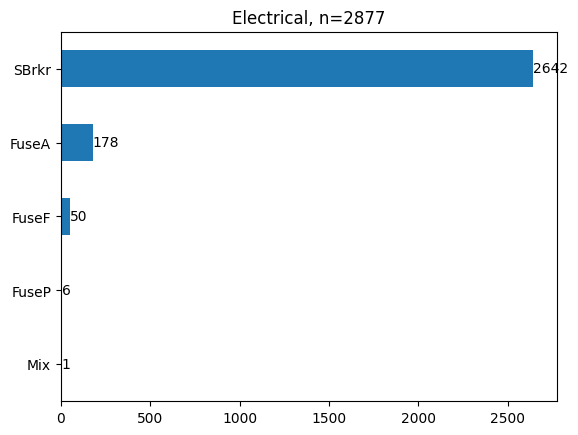

In [75]:
plot_categoricals(data,['Electrical'])

`Na feature acima, vamos agrupar as 3 categorias relacionadas ao sistema de eletricidade com uso de fusível em uma unica categoria`

In [76]:
processed_data['Electrical'].value_counts()

SBrkr    2642
FuseA     178
FuseF      50
FuseP       6
Mix         1
Name: Electrical, dtype: int64

In [77]:
processed_data['Electrical'] =remap_categories(
    series=processed_data['Electrical'],
    old_categories=('FuseA','FuseF','FuseP'),
    new_category='Fuse'
)

In [78]:
processed_data['Electrical'].value_counts()

SBrkr    2642
Fuse      234
Mix         1
Name: Electrical, dtype: int64

            count unique top  freq
Paved.Drive  2877      3   Y  2620


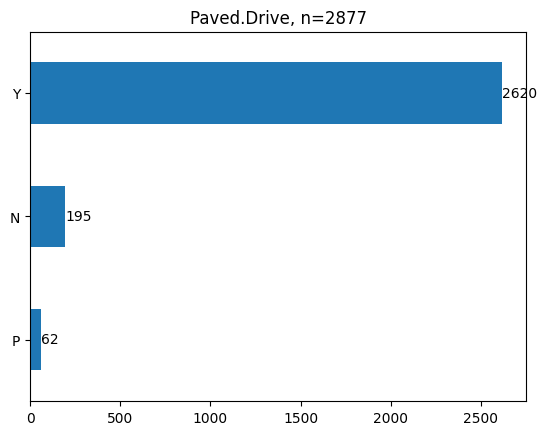

In [79]:
plot_categoricals(data,['Paved.Drive'])

`A feature acima que significa se a entrada da casa é pavimentada possui pouca representatividade de dados, portanto iremos dropar essa feature`

In [80]:
processed_data = processed_data.drop(columns='Paved.Drive')

Features núméricas agora 

             count      mean       std  min  25%  50%  75%  max
Fireplaces  2877.0  0.601321  0.646945  0.0  0.0  1.0  1.0  4.0


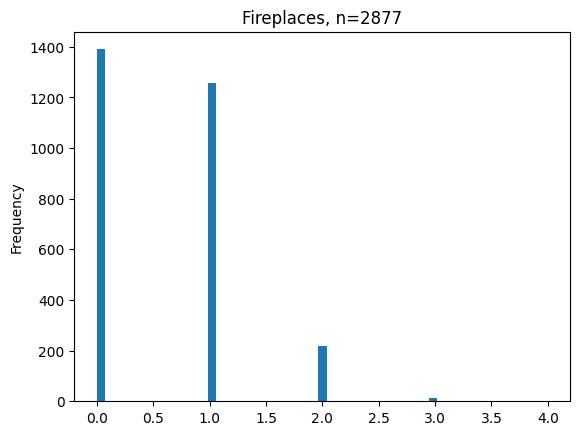

In [81]:
plot_numericals(processed_data,['Fireplaces'])

`Como a feature 'Fireplaces' contem um número limitado de categorias, podemos transformá-la em uma nova feature categórica, 'HasFireplace', a qual representa somente se a casa possui lareira ou não.`

In [82]:
processed_data['HasFireplace'] = (processed_data['Fireplaces'] > 0).astype(int)

In [83]:
processed_data['HasFireplace'].value_counts()

1    1487
0    1390
Name: HasFireplace, dtype: int64

In [84]:
processed_data = processed_data.drop(columns='Fireplaces')

                 count      mean       std  min  25%  50%  75%  max
Bsmt.Full.Bath  2877.0  0.433785  0.525642  0.0  0.0  0.0  1.0  3.0


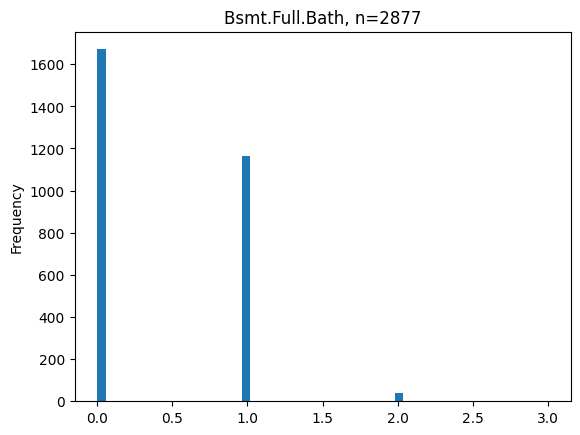

In [85]:
plot_numericals(processed_data,['Bsmt.Full.Bath'])

`Igualmente como foi feito na feature Fireplaces, vamos transformar essa feature em uma nova feature 'HasBsmtFullBath'.`

In [86]:
processed_data['HasBsmtFullBath'] = (processed_data['Bsmt.Full.Bath'] > 0).astype(int)

In [87]:
processed_data['HasBsmtFullBath'].value_counts()

0    1671
1    1206
Name: HasBsmtFullBath, dtype: int64

In [88]:
processed_data = processed_data.drop(columns='Bsmt.Full.Bath')

                 count     mean       std  min  25%  50%  75%  max
Bsmt.Half.Bath  2877.0  0.06187  0.246666  0.0  0.0  0.0  0.0  2.0


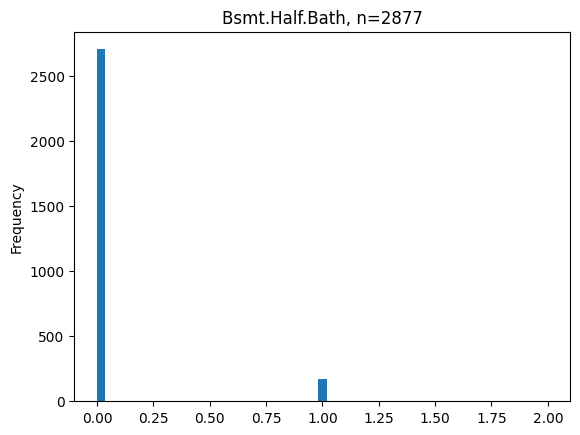

In [89]:
plot_numericals(processed_data,['Bsmt.Half.Bath'])

In [90]:
processed_data['Bsmt.Half.Bath'].value_counts()

0.0    2703
1.0     170
2.0       4
Name: Bsmt.Half.Bath, dtype: int64

`Como esta feature possui baixa representatividade de dados, iremos exclui-la`

In [91]:
processed_data = processed_data.drop(columns='Bsmt.Half.Bath')

                count      mean       std  min  25%  50%  75%  max
Kitchen.AbvGr  2877.0  1.044143  0.213744  0.0  1.0  1.0  1.0  3.0


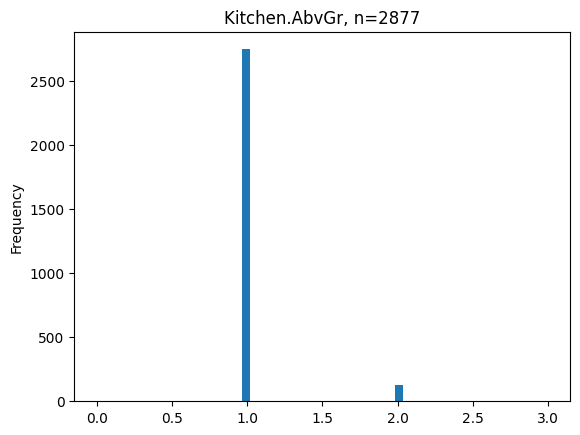

In [92]:
plot_numericals(processed_data,['Kitchen.AbvGr'])

In [93]:
processed_data['Kitchen.AbvGr'].value_counts()

1.0    2746
2.0     126
0.0       3
3.0       2
Name: Kitchen.AbvGr, dtype: int64

In [94]:
processed_data = processed_data.drop(columns='Kitchen.AbvGr')

              count      mean      std  min  25%  50%  75%  max
Garage.Cars  2877.0  1.774765  0.75745  0.0  1.0  2.0  2.0  5.0


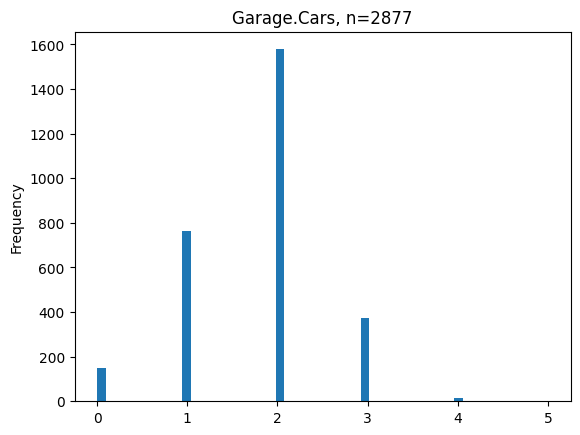

In [95]:
plot_numericals(processed_data,['Garage.Cars'])

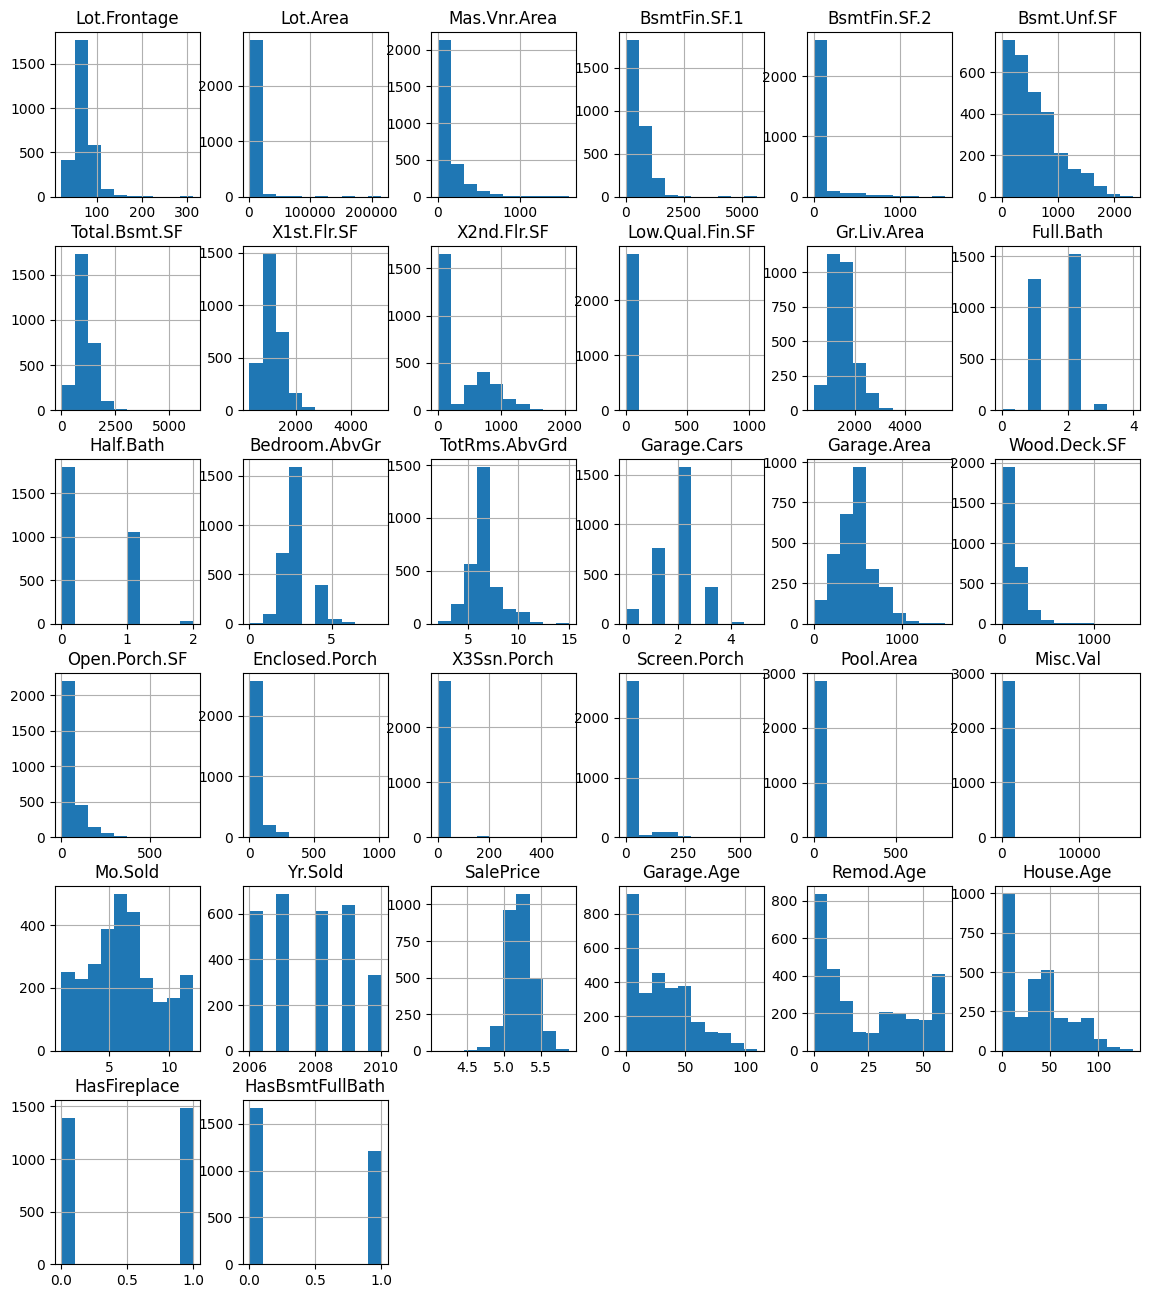

In [96]:
processed_data.hist(figsize=(14,16))
plt.show(block=False)

           count       mean         std  min  25%  50%  75%      max
Misc.Val  2877.0  51.354536  571.419703  0.0  0.0  0.0  0.0  17000.0


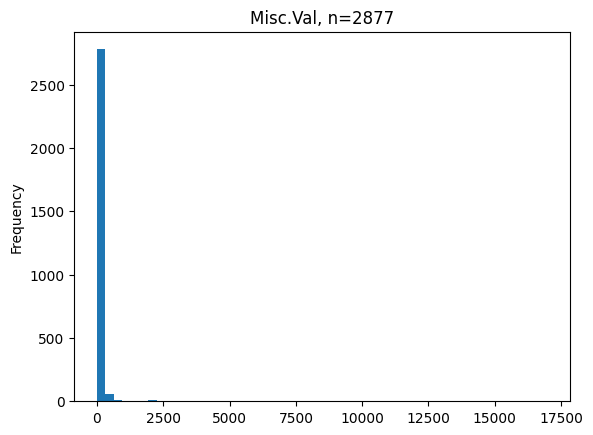

In [97]:
plot_numericals(processed_data,['Misc.Val'])

In [98]:
processed_data['Misc.Val'].value_counts()

0.0        2776
400.0        18
500.0        13
450.0         9
600.0         8
2000.0        7
700.0         7
1500.0        3
1200.0        3
650.0         3
480.0         2
3000.0        2
4500.0        2
2500.0        2
455.0         1
620.0         1
17000.0       1
1000.0        1
15500.0       1
8300.0        1
1300.0        1
460.0         1
1512.0        1
900.0         1
1150.0        1
6500.0        1
1400.0        1
750.0         1
800.0         1
12500.0       1
350.0         1
490.0         1
80.0          1
3500.0        1
300.0         1
420.0         1
Name: Misc.Val, dtype: int64

In [99]:
processed_data = processed_data.drop(columns='Misc.Val')

Finalizada a Feature Engineering, agora só salvar os dados

In [100]:
processed_data.describe()

,Lot.Frontage,Lot.Area,Mas.Vnr.Area,BsmtFin.SF.1,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,...,Screen.Porch,Pool.Area,Mo.Sold,Yr.Sold,SalePrice,Garage.Age,Remod.Age,House.Age,HasFireplace,HasBsmtFullBath
count,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.00000,2877.000000,...,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000
mean,69.202989,10171.366354,102.876260,445.111922,50.076121,562.832812,1058.020855,1163.242614,336.94960,4.584637,...,16.262426,2.284672,6.207855,2007.788669,5.224419,29.420577,23.272854,35.985401,0.516858,0.419187
std,21.204969,7833.442896,179.732526,456.415687,169.983156,440.585750,439.000776,389.081826,429.84432,45.759563,...,56.539120,35.922368,2.709106,1.314505,0.172777,24.397547,20.788480,30.050290,0.499803,0.493512
min,21.000000,1470.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.00000,0.000000,...,0.000000,0.000000,1.000000,2006.000000,4.106837,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7500.000000,0.000000,0.000000,0.000000,222.000000,796.000000,880.000000,0.00000,0.000000,...,0.000000,0.000000,4.000000,2007.000000,5.113943,7.000000,4.000000,7.000000,0.000000,0.000000
50%,68.000000,9490.000000,0.000000,374.000000,0.000000,468.000000,992.000000,1088.000000,0.00000,0.000000,...,0.000000,0.000000,6.000000,2008.000000,5.206826,28.000000,15.000000,34.000000,1.000000,0.000000
75%,79.000000,11600.000000,166.000000,735.000000,0.000000,808.000000,1309.000000,1392.000000,708.00000,0.000000,...,0.000000,0.000000,8.000000,2009.000000,5.330414,46.000000,42.000000,54.000000,1.000000,1.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.00000,1064.000000,...,576.000000,800.000000,12.000000,2010.000000,5.877947,110.000000,60.000000,136.000000,1.000000,1.000000


In [101]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2877 entries, 0 to 2929
Data columns (total 64 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   MS.SubClass      2877 non-null   category
 1   MS.Zoning        2877 non-null   category
 2   Lot.Frontage     2877 non-null   float64 
 3   Lot.Area         2877 non-null   float64 
 4   Lot.Shape        2877 non-null   category
 5   Land.Contour     2877 non-null   category
 6   Lot.Config       2877 non-null   category
 7   Neighborhood     2877 non-null   category
 8   Bldg.Type        2877 non-null   category
 9   House.Style      2877 non-null   category
 10  Overall.Qual     2877 non-null   category
 11  Overall.Cond     2877 non-null   category
 12  Roof.Style       2877 non-null   category
 13  Mas.Vnr.Type     2877 non-null   category
 14  Mas.Vnr.Area     2877 non-null   float64 
 15  Exter.Qual       2877 non-null   category
 16  Exter.Cond       2877 non-null   category


In [102]:
data = processed_data

In [103]:
with open(clean_data_path, 'wb') as file:
    pickle.dump(data, file)